In [83]:
import pandas as pd
import pickle

from typing import List

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split



In [84]:
# Cargar DataFrame desde un archivo pickle
with open('df_eda.pkl', 'rb') as file:
    df = pickle.load(file)



In [85]:
df.head(2)

,PaisActual,CodigoPostalActual,Genero,FactoresInfluenciaCarrera,EducacionSuperiorExtranjero,ProbabilidadLealtadLaboral,TrabajariaEmpresaMisionNoDefinida,ProbabilidadTrabajarMisionDesalineada,ProbabilidadTrabajarSinImpactoSocial,EntornoTrabajoPreferido,EmpleadoresPreferidos,EntornoAprendizajePreferido,CarreraAspiracional,TipoGerentePreferido,ConfiguracionPreferida
0,India,273005,Masculino,Personas que cambiaron el mundo para mejor,"Si, ganaría lo suficiente y lo haría","Eso sería dificil, pero si es la compañía corr...",0,0,4,Completamente remoto sin opción de visitar ofi...,Empleador que recompensa el aprendizaje y faci...,Programas de aprendizaje con instructor o expe...,"Business Operations in any organization, Build...","Gerente que explica lo que se espera, establec...","Work alone, Work with 2 to 3 people in my team..."
1,India,851129,Masculino,Personas que cambiaron el mundo para mejor,"No, pero si alguien pudiera cubrir el costo lo...","Eso sería dificil, pero si es la compañía corr...",0,0,1,Completamente remoto con opciones de viajar cu...,Empleador que te lleva al límite proporcionand...,"Portales de aprendizaje autodirigido, Programa...","Business Operations in any organization, Build...","Gerente que explica lo que se espera, establec...",Work with 5 to 6 people in my team


In [86]:
#Verificamos las columnas
columnas = df.columns
columnas

Index(['PaisActual', 'CodigoPostalActual', 'Genero',
       'FactoresInfluenciaCarrera', 'EducacionSuperiorExtranjero',
       'ProbabilidadLealtadLaboral', 'TrabajariaEmpresaMisionNoDefinida',
       'ProbabilidadTrabajarMisionDesalineada',
       'ProbabilidadTrabajarSinImpactoSocial', 'EntornoTrabajoPreferido',
       'EmpleadoresPreferidos', 'EntornoAprendizajePreferido',
       'CarreraAspiracional', 'TipoGerentePreferido',
       'ConfiguracionPreferida'],
      dtype='object')

In [87]:
# Estas variables no se consideraran ya que la primera no presenta variabilidad y la segunda no intruce mayor valor al resultado de la encuenta
variables_no_consideradas = ['PaisActual', 'CodigoPostalActual']

#Son las primeras variables consideradas, ya que corresponden a variables numericas
variables_selec = ['TrabajariaEmpresaMisionNoDefinida','ProbabilidadTrabajarMisionDesalineada','ProbabilidadTrabajarSinImpactoSocial']

#Para considerar estas variables se trabajara con OneHotEndoder para convertirlas a variables dummies
variables_dummies = ['Genero','FactoresInfluenciaCarrera', 'EducacionSuperiorExtranjero','EntornoTrabajoPreferido',
'EmpleadoresPreferidos', 'EntornoAprendizajePreferido','TipoGerentePreferido']

#Para esta variables se deveran separar por las comas y considerar cada variable como un elemento, para luego transformar a dummies
multivariables = ['CarreraAspiracional','ConfiguracionPreferida']

#Se determina la variable objetivo
y = df['ProbabilidadLealtadLaboral']

#Se adignan las primeras variables
X = df[variables_selec]

X.head()

,TrabajariaEmpresaMisionNoDefinida,ProbabilidadTrabajarMisionDesalineada,ProbabilidadTrabajarSinImpactoSocial
0,0,0,4
1,0,0,1
2,1,1,7
3,0,0,6
4,0,0,5


In [88]:
#Verificamos la matriz de correlación
X.corr()

,TrabajariaEmpresaMisionNoDefinida,ProbabilidadTrabajarMisionDesalineada,ProbabilidadTrabajarSinImpactoSocial
TrabajariaEmpresaMisionNoDefinida,1.000000,0.586108,0.181731
ProbabilidadTrabajarMisionDesalineada,0.586108,1.000000,0.165004
ProbabilidadTrabajarSinImpactoSocial,0.181731,0.165004,1.000000


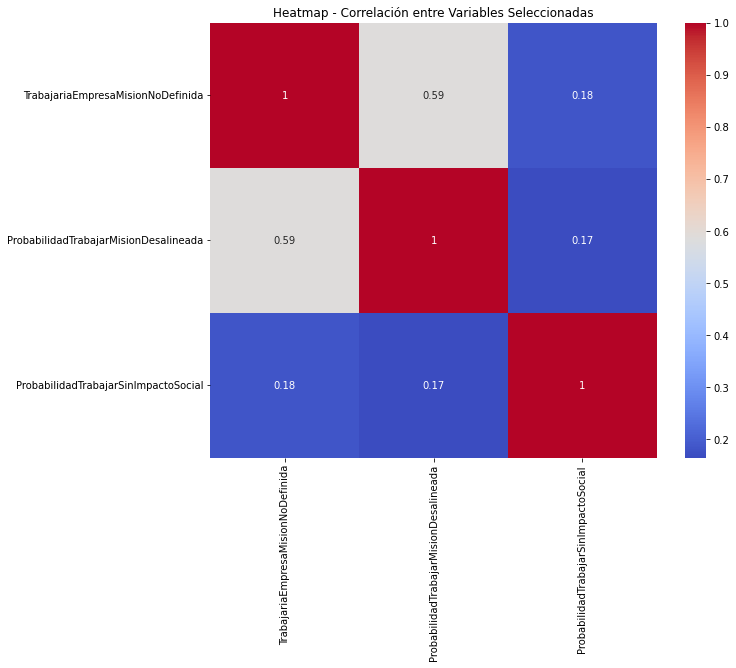

In [89]:
# Creamos el heatmap que ilustra lo anterior visualizando que no mantienen correlacion directa los datos
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap - Correlación entre Variables Seleccionadas')
plt.show()

In [90]:
#Realizamos el tratamiento de datos con OneHotEncoder para trasnformar las variables categoricas a variables dummies
transformador = OneHotEncoder(sparse_output=False)

# Aplicar el encoder a las columnas
encoded_data = transformador.fit_transform(df[variables_dummies])

# Obtener los nombres de las columnas resultantes
encoded_columns = transformador.get_feature_names_out(variables_dummies)

# Crear un DataFrame con los datos codificados
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns)

df_encoded.head()

,Genero_Femenino,Genero_Masculino,FactoresInfluenciaCarrera_Influencer con carreras exitosas,FactoresInfluenciaCarrera_Mis Padres,"FactoresInfluenciaCarrera_Personas de mi circulo, pero no de mi familia",FactoresInfluenciaCarrera_Personas que cambiaron el mundo para mejor,FactoresInfluenciaCarrera_Redes sociales como LinkedIn,"EducacionSuperiorExtranjero_No, no buscaría Educación Superior fuera de la India","EducacionSuperiorExtranjero_No, pero si alguien pudiera cubrir el costo lo haría","EducacionSuperiorExtranjero_Si, ganaría lo suficiente y lo haría",...,"EntornoAprendizajePreferido_Portales de aprendizaje autodirigido, Aprendizaje observando a otros","EntornoAprendizajePreferido_Portales de aprendizaje autodirigido, Programas de aprendizaje con instructor o experto","EntornoAprendizajePreferido_Portales de aprendizaje autodirigido, Prueba y error haciendo proyectos paralelos dentro de la empresa","EntornoAprendizajePreferido_Programas de aprendizaje con instructor o experto, Aprendizaje observando a otros","EntornoAprendizajePreferido_Programas de aprendizaje con instructor o experto, Prueba y error haciendo proyectos paralelos dentro de la empresa",TipoGerentePreferido_Gerente que describe claramente lo que necesita,TipoGerentePreferido_Gerente que establece objetivos inalcanzables,TipoGerentePreferido_Gerente que establece objetivos y espera que los logre,TipoGerentePreferido_Gerente que establece un objetivo y me ayuda a alcanzarlo,"TipoGerentePreferido_Gerente que explica lo que se espera, establece un objetivo y ayuda a alcanzarlo"
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [91]:
#Verificamos la forma del dataset
df_encoded.shape

(235, 32)

In [92]:
#Realizamos un matriz de correlacion
df_encoded.corr()

,Genero_Femenino,Genero_Masculino,FactoresInfluenciaCarrera_Influencer con carreras exitosas,FactoresInfluenciaCarrera_Mis Padres,"FactoresInfluenciaCarrera_Personas de mi circulo, pero no de mi familia",FactoresInfluenciaCarrera_Personas que cambiaron el mundo para mejor,FactoresInfluenciaCarrera_Redes sociales como LinkedIn,"EducacionSuperiorExtranjero_No, no buscaría Educación Superior fuera de la India","EducacionSuperiorExtranjero_No, pero si alguien pudiera cubrir el costo lo haría","EducacionSuperiorExtranjero_Si, ganaría lo suficiente y lo haría",...,"EntornoAprendizajePreferido_Portales de aprendizaje autodirigido, Aprendizaje observando a otros","EntornoAprendizajePreferido_Portales de aprendizaje autodirigido, Programas de aprendizaje con instructor o experto","EntornoAprendizajePreferido_Portales de aprendizaje autodirigido, Prueba y error haciendo proyectos paralelos dentro de la empresa","EntornoAprendizajePreferido_Programas de aprendizaje con instructor o experto, Aprendizaje observando a otros","EntornoAprendizajePreferido_Programas de aprendizaje con instructor o experto, Prueba y error haciendo proyectos paralelos dentro de la empresa",TipoGerentePreferido_Gerente que describe claramente lo que necesita,TipoGerentePreferido_Gerente que establece objetivos inalcanzables,TipoGerentePreferido_Gerente que establece objetivos y espera que los logre,TipoGerentePreferido_Gerente que establece un objetivo y me ayuda a alcanzarlo,"TipoGerentePreferido_Gerente que explica lo que se espera, establece un objetivo y ayuda a alcanzarlo"
Genero_Femenino,1.000000,-1.000000,0.038624,-0.048767,-0.026891,-0.024414,0.099073,0.043275,-0.044833,0.000384,...,-0.018948,0.003448,-0.082818,0.005151,-0.002923,0.042864,-0.080922,-0.033459,-0.134500,0.101992
Genero_Masculino,-1.000000,1.000000,-0.038624,0.048767,0.026891,0.024414,-0.099073,-0.043275,0.044833,-0.000384,...,0.018948,-0.003448,0.082818,-0.005151,0.002923,-0.042864,0.080922,0.033459,0.134500,-0.101992
FactoresInfluenciaCarrera_Influencer con carreras exitosas,0.038624,-0.038624,1.000000,-0.307624,-0.192829,-0.244622,-0.142385,-0.058351,-0.038766,0.086185,...,0.064006,0.046090,-0.024428,-0.014017,-0.032220,0.027166,-0.049157,-0.094460,-0.058559,0.086624
FactoresInfluenciaCarrera_Mis Padres,-0.048767,0.048767,-0.307624,1.000000,-0.317436,-0.402697,-0.234394,0.002999,-0.086150,0.072595,...,-0.092347,0.065768,-0.052503,0.123829,-0.048709,0.042864,0.079556,0.219160,0.137552,-0.278166
"FactoresInfluenciaCarrera_Personas de mi circulo, pero no de mi familia",-0.026891,0.026891,-0.192829,-0.317436,1.000000,-0.252425,-0.146927,-0.020129,0.158501,-0.120463,...,-0.102715,-0.073631,0.045536,-0.024239,0.044531,-0.100812,-0.050725,-0.099641,-0.035813,0.174497
FactoresInfluenciaCarrera_Personas que cambiaron el mundo para mejor,-0.024414,0.024414,-0.244622,-0.402697,-0.252425,1.000000,-0.186390,0.093971,0.010173,-0.093131,...,0.102007,0.015783,-0.019336,-0.129350,0.077841,-0.023084,0.024084,-0.072862,-0.026562,0.074032
FactoresInfluenciaCarrera_Redes sociales como LinkedIn,0.099073,-0.099073,-0.142385,-0.234394,-0.146927,-0.186390,1.000000,-0.043595,-0.028650,0.064117,...,0.049821,-0.091629,0.084290,0.037253,-0.051109,0.058079,-0.037455,-0.002777,-0.063747,0.010777
"EducacionSuperiorExtranjero_No, no buscaría Educación Superior fuera de la India",0.043275,-0.043275,-0.058351,0.002999,-0.020129,0.093971,-0.043595,1.000000,-0.362067,-0.580061,...,-0.039032,-0.050878,-0.011580,0.066666,-0.034980,-0.010803,0.014424,-0.060310,0.020006,0.025219
"EducacionSuperiorExtranjero_No, pero si alguien pudiera cubrir el costo lo haría",-0.044833,0.044833,-0.038766,-0.086150,0.158501,0.010173,-0.028650,-0.362067,1.000000,-0.549285,...,0.007895,-0.046448,0.069878,-0.114895,0.087072,-0.061742,-0.066585,-0.115005,-0.092354,0.197373
"EducacionSuperiorExtranjero_Si, ganaría lo suficiente y lo haría",0.000384,-0.000384,0.086185,0.072595,-0.120463,-0.093131,0.064117,-0.580061,-0.549285,1.000000,...,0.028091,0.08

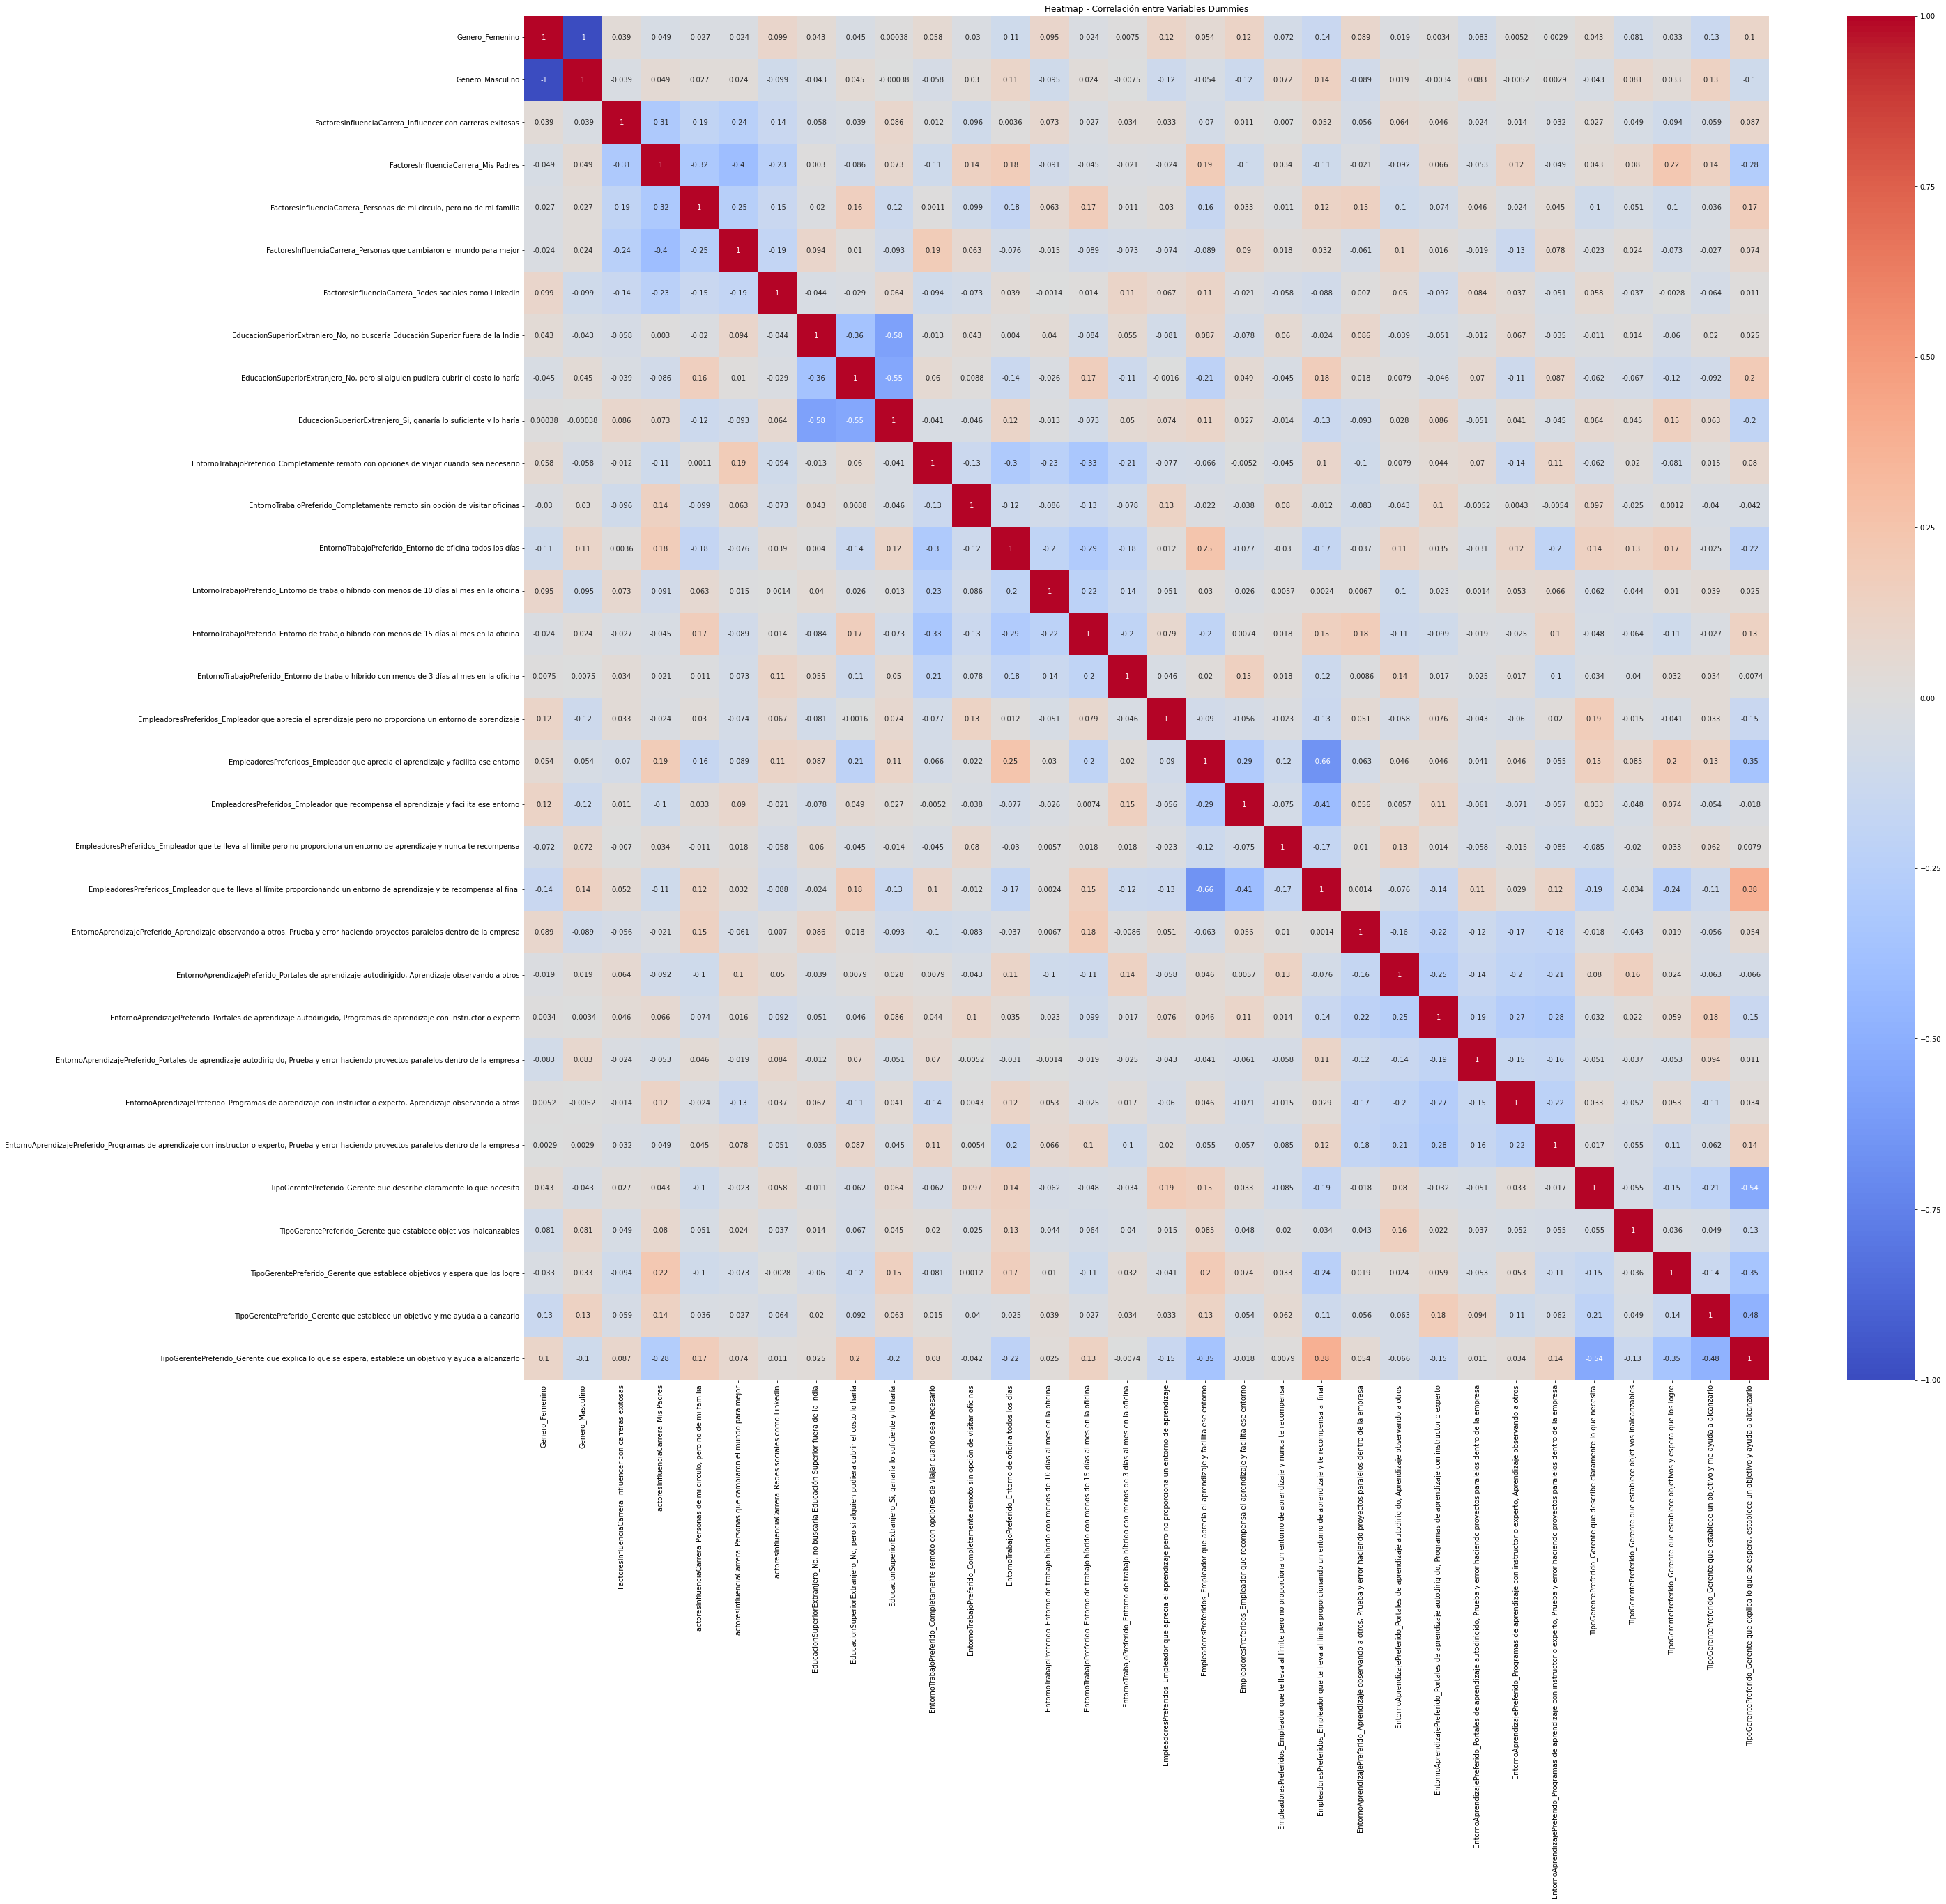

In [93]:
# Graficamos
correlation_matrix = df_encoded.corr()

# Crear el heatmap
plt.figure(figsize=(40, 36))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Heatmap - Correlación entre Variables Dummies')
plt.show()

In [94]:
#Concatenamoa los el dataset dummies
X = pd.concat([X, df_encoded], axis=1)
X.shape

(235, 35)

In [95]:
df[multivariables]

,CarreraAspiracional,ConfiguracionPreferida
0,"Business Operations in any organization, Build...","Work alone, Work with 2 to 3 people in my team..."
1,"Business Operations in any organization, Build...",Work with 5 to 6 people in my team
2,Manage and drive End-to-End Projects or Produc...,"Work with 2 to 3 people in my team, Work with ..."
3,"Business Operations in any organization, Manag...",Work with 2 to 3 people in my team
4,Teaching in any of the institutes/online or Of...,"Work with 2 to 3 people in my team, Work with ..."
...,...,...
230,"Design and Creative strategy in any company, B...",Work with more than 10 people in my team
231,"Business Operations in any organization, Look ...",Work with 2 to 3 people in my team
232,"Design and Creative strategy in any company, B...",Work with more than 10 people in my team
233,Teaching in any of the institutes/online or Of...,Work with 5 to 6 people in my team


In [96]:
def reemplazar(data: pd.DataFrame, col: str) -> pd.Series:
    # Verificar los tipos de los argumentos
    if not isinstance(data, pd.DataFrame):
        raise TypeError("El primer argumento debe ser un DataFrame")
    if not isinstance(col, str):
        raise TypeError("El segundo argumento debe ser una cadena de texto (string)")

    reemplazos = {
        'Design and Creative strategy in any company': 'Estrategia de diseño y creatividad en cualquier empresa',
        'Look deeply into Data and generate insights': 'Analizar datos profundamente y generar insights',
        'Business Operations in any organization': 'Operaciones comerciales en cualquier organización',
        'Manage and drive End-to-End Projects or Products': 'Gestionar y dirigir proyectos o productos de principio a fin',
        'Build and develop a Team': 'Construir y desarrollar un equipo',
        'Teaching in any of the institutes/online or Offline': 'Enseñar en cualquier institución (en línea o presencial)',
        'Work as a freelancer and do my thing my way': 'Trabajar como freelancer y hacer las cosas a mi manera',
        'Design and Develop amazing software': 'Diseñar y desarrollar software increíble',
        'Become a content Creator in some platform': 'Convertirse en un creador de contenido en alguna plataforma',
        'Work in a BPO setup for some well known client': 'Trabajar en un centro de atención al cliente para algún cliente conocido',
        'Work with 5 to 6 people in my team': 'Trabajar con 5 a 6 personas en mi equipo',
        'Work with 2 to 3 people in my team': 'Trabajar con 2 a 3 personas en mi equipo',
        'Work alone': 'Trabajar solo',
        'Work with more than 10 people in my team': 'Trabajar con más de 10 personas en mi equipo',
        'Work with 7 to 10 or more people in my team': 'Trabajar con 7 a 10 o más personas en mi equipo'
    }

    # Reemplazar valores dentro de la columna `col` utilizando el diccionario
    for key, value in reemplazos.items():
        data[col] = data[col].str.replace(key, value)
    
    return data[col]

def multi_var(data: pd.DataFrame, cols: List[str]) -> pd.DataFrame:
    final = pd.DataFrame()
    
    # Iterar sobre cada columna en la lista `cols`
    for col in cols:
        # Reemplazar valores en la columna antes de dividir
        data[col] = reemplazar(data, col)
        
        # Paso 1: Dividir la columna en múltiples columnas
        split_cols = data[col].str.split(', ', expand=True)
        
        # Paso 2: Renombrar las columnas resultantes
        split_cols.columns = [f'{col}_var_{i+1}' for i in range(split_cols.shape[1])]
        
        # Paso 3: Crear variables dummies para cada columna dividida
        stack = split_cols.stack()
        dummies = pd.get_dummies(stack)
        dummies_group = dummies.groupby(level=0).sum()
        
        # Renombrar las columnas dummies
        dummies_group.columns = [f'{col}_{dummy_col}' for dummy_col in dummies_group.columns]
        
        # Concatenar al DataFrame final
        final = pd.concat([final, dummies_group], axis=1)
    
    return final

In [97]:
X_mutivar = multi_var(df, multivariables)
X_mutivar

,CarreraAspiracional_Analizar datos profundamente y generar insights,CarreraAspiracional_Construir y desarrollar un equipo,CarreraAspiracional_Convertirse en un creador de contenido en alguna plataforma,CarreraAspiracional_Diseñar y desarrollar software increíble,CarreraAspiracional_Enseñar en cualquier institución (en línea o presencial),CarreraAspiracional_Estrategia de diseño y creatividad en cualquier empresa,CarreraAspiracional_Gestionar y dirigir proyectos o productos de principio a fin,CarreraAspiracional_Operaciones comerciales en cualquier organización,CarreraAspiracional_Trabajar como freelancer y hacer las cosas a mi manera,CarreraAspiracional_Trabajar en un centro de atención al cliente para algún cliente conocido,ConfiguracionPreferida_Trabajar con 2 a 3 personas en mi equipo,ConfiguracionPreferida_Trabajar con 5 a 6 personas en mi equipo,ConfiguracionPreferida_Trabajar con 7 a 10 o más personas en mi equipo,ConfiguracionPreferida_Trabajar con más de 10 personas en mi equipo,ConfiguracionPreferida_Trabajar solo
0,0,1,0,0,0,0,0,1,1,0,1,1,1,1,1
1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0
3,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
4,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
231,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0
232,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
233,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0


In [98]:
X_mutivar.shape

(235, 15)

In [99]:
X = pd.concat([X, X_mutivar], axis=1)
X.shape

(235, 50)

In [123]:
y.value_counts()

ProbabilidadLealtadLaboral
Eso sería dificil, pero si es la compañía correcta lo intentaría    139
Trabajaría por 3 años o más                                          79
De ninguna forma, 3 años con un empleador es para volverse loco      17
Name: count, dtype: int64

In [100]:
# Convertir la variable objetivo categórica a numérica
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Obtener los valores únicos y sus códigos correspondientes
valores_unicos = label_encoder.classes_
codigos_correspondientes = label_encoder.transform(valores_unicos)

print("Categorías originales y sus códigos únicos:")
for categoria, codigo in zip(valores_unicos, codigos_correspondientes):
    print(categoria, "->", codigo)

Categorías originales y sus códigos únicos:
De ninguna forma, 3 años con un empleador es para volverse loco -> 0
Eso sería dificil, pero si es la compañía correcta lo intentaría -> 1
Trabajaría por 3 años o más -> 2


In [101]:
#Dividimos los datos para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [102]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [103]:
# Ajustar PCA solo con los datos de entrenamiento
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [104]:
# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Sumar la varianza explicada acumulativa
cumulative_variance = pca.explained_variance_ratio_.cumsum()
cumulative_variance

array([0.07441259, 0.12522039, 0.17411008, 0.2180463 , 0.25828147,
       0.29773609, 0.3352439 , 0.37098706, 0.40602137, 0.43948391,
       0.47010072, 0.50005688, 0.52926137, 0.5574099 , 0.58507696,
       0.61163278, 0.63762849, 0.66121999, 0.68408859, 0.7057978 ,
       0.72729254, 0.74735928, 0.76681832, 0.78535333, 0.8030515 ,
       0.82028929, 0.83658709, 0.85277094, 0.86745033, 0.88185309,
       0.8954509 , 0.9080413 , 0.92029348, 0.9322538 , 0.9432256 ,
       0.95359028, 0.96316249, 0.97230911, 0.98093031, 0.98860742,
       0.99525768, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

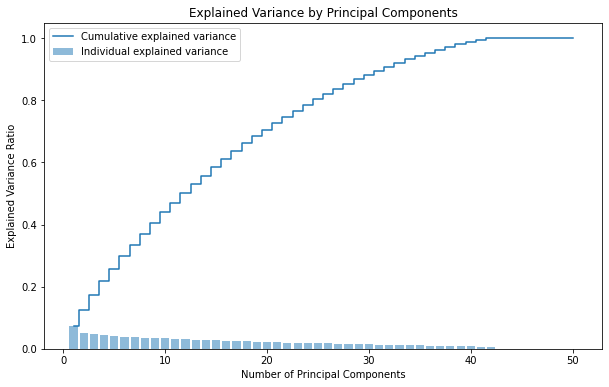

In [106]:
# Graficar la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()


In [107]:
# Determinar el número óptimo de componentes principales
optimal_components = next(i for i, total in enumerate(cumulative_variance) if total >= 0.9) + 1
print(f'Número óptimo de componentes principales: {optimal_components}')

Número óptimo de componentes principales: 32


In [118]:
# Aplicar PCA con el número óptimo de componentes
pca = PCA(n_components=optimal_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [119]:
print(f"Dimensiones de X_train_pca: {X_train_pca.shape}")
print(f"Dimensiones de X_test_pca: {X_test_pca.shape}")

Dimensiones de X_train_pca: (188, 32)
Dimensiones de X_test_pca: (47, 32)


In [124]:
# Guardar las variables en un archivo pickle
with open('datos_split_procesados.pickle', 'wb') as f:
    pickle.dump((X_train_pca, X_test_pca, y_train, y_test), f)
